In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/lh/bzhgg2_j4kq3kt4c6_h4780r0000gn/T/ipykernel_88145/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
df = pd.read_csv("results.csv")

### Initial pose to Pregrasp

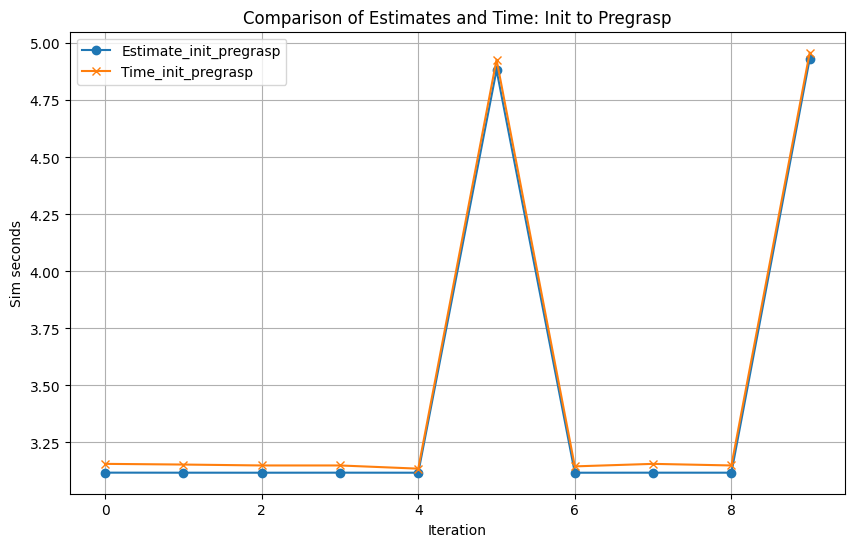

In [25]:
values = list(df.Estimate_init_pregrasp) + list(df.Time_init_pregrasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Estimate_init_pregrasp'], label='Estimate_init_pregrasp', marker='o')
plt.plot(df['Time_init_pregrasp'], label='Time_init_pregrasp', marker='x')

plt.title('Comparison of Estimates and Time: Init to Pregrasp')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)
plt.show()

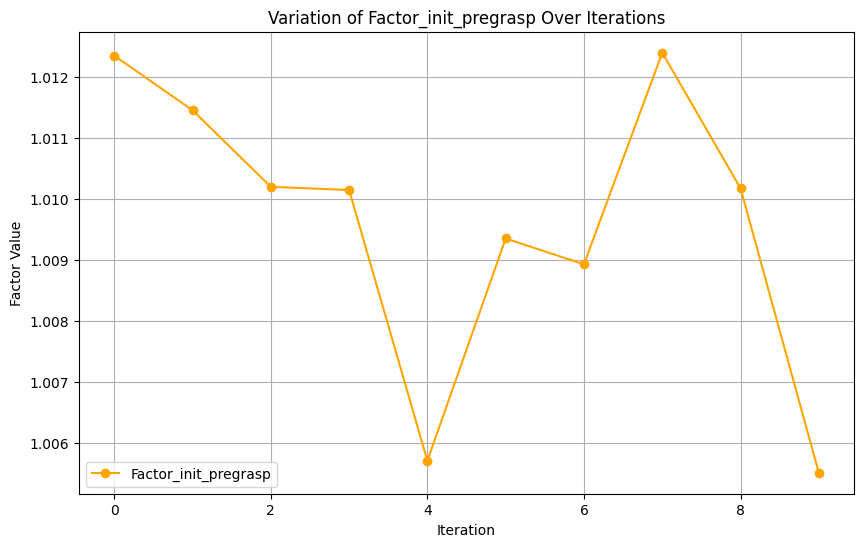

In [27]:
values = list(df.Factor_init_pregrasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Factor_init_pregrasp'], label='Factor_init_pregrasp', marker='o', color='orange')

plt.title('Variation of Factor_init_pregrasp Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Factor Value')
plt.legend()
plt.grid(True)

plt.show()

### Pregrasp to Grasp

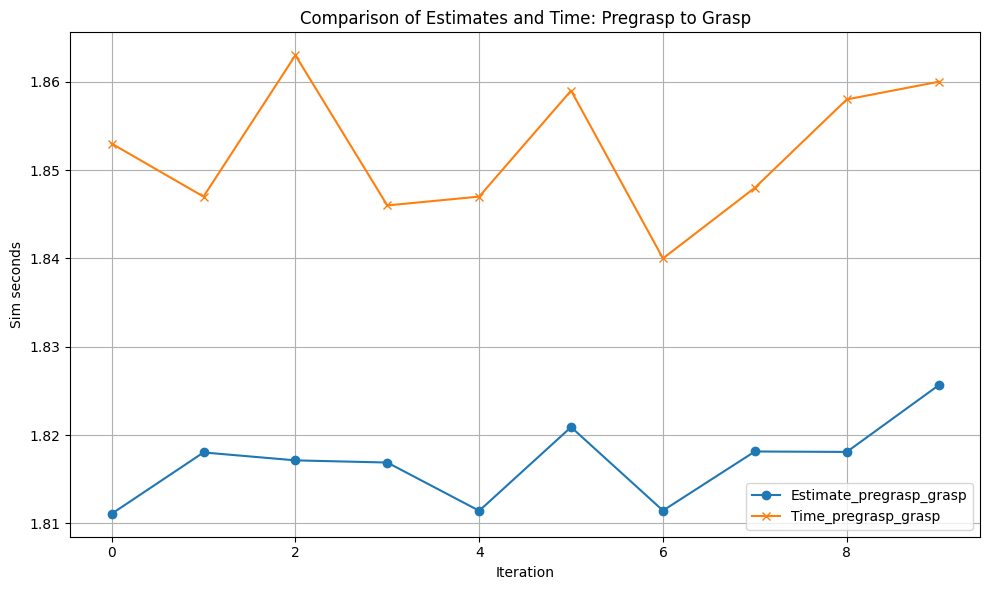

In [18]:
values = list(df.Estimate_pregrasp_grasp) + list(df.Time_pregrasp_grasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Estimate_pregrasp_grasp'], label='Estimate_pregrasp_grasp', marker='o')
plt.plot(df['Time_pregrasp_grasp'], label='Time_pregrasp_grasp', marker='x')

plt.title('Comparison of Estimates and Time: Pregrasp to Grasp')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)

plt.show()

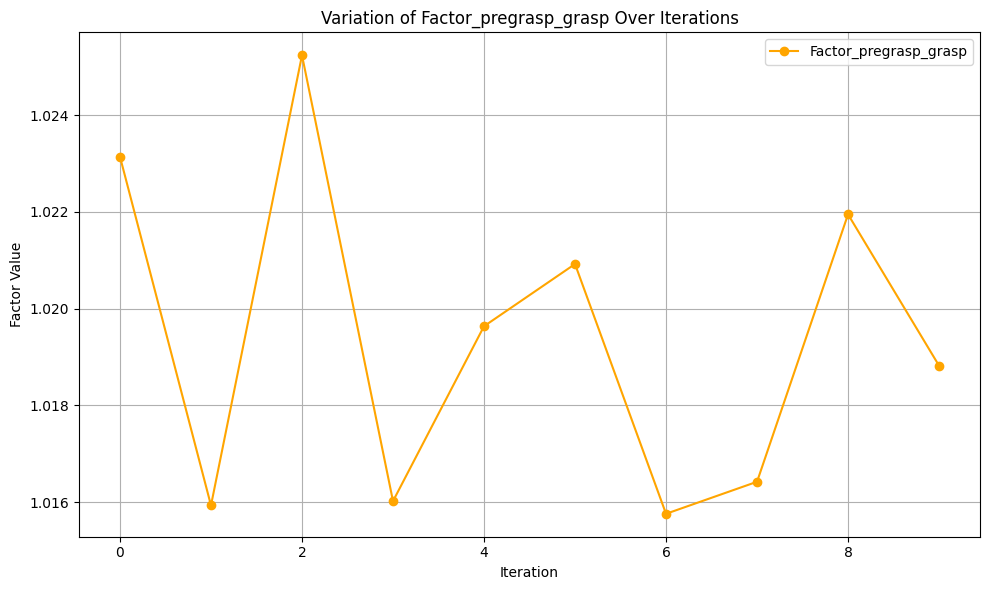

In [19]:
values = list(df.Factor_pregrasp_grasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Factor_pregrasp_grasp'], label='Factor_pregrasp_grasp', marker='o', color='orange')
plt.title('Variation of Factor_pregrasp_grasp Over Iterations')

plt.xlabel('Iteration')
plt.ylabel('Factor Value')
plt.legend()
plt.grid(True)

plt.show()

### Gripping

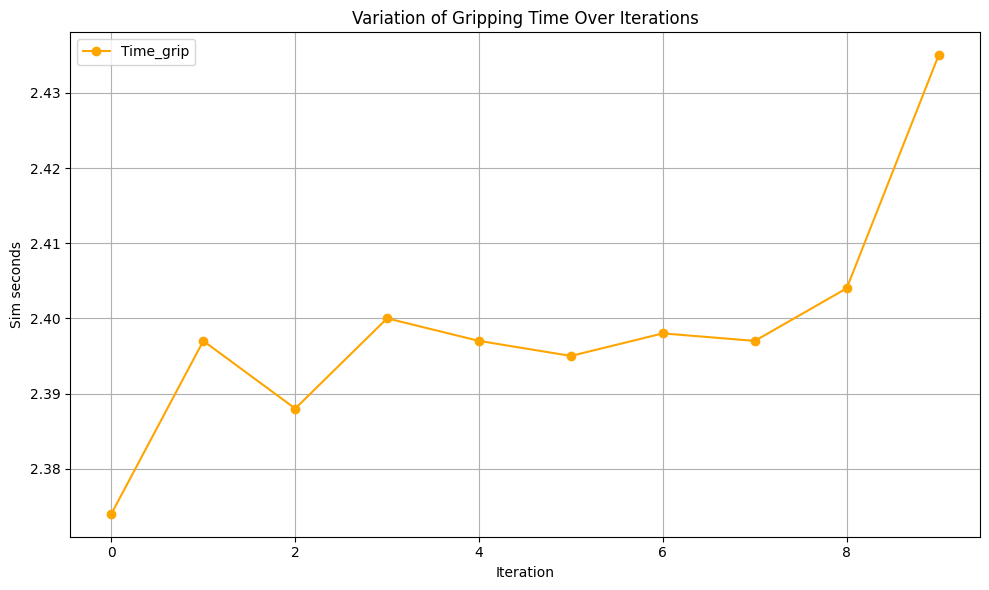

In [20]:
values = list(df.Time_grip)
plt.figure(figsize=(10, 6))
plt.plot(df['Time_grip'], label='Time_grip', marker='o', color='orange')

plt.title('Variation of Gripping Time Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)

plt.show()

### Grasp to Postgrasp

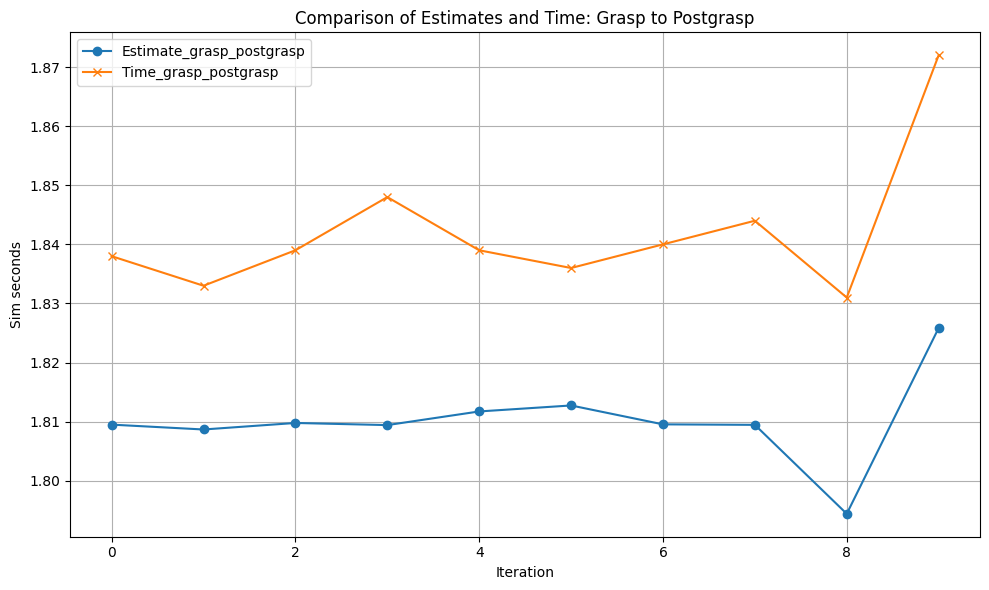

In [21]:
values = list(df.Estimate_grasp_postgrasp) + list(df.Time_grasp_postgrasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Estimate_grasp_postgrasp'], label='Estimate_grasp_postgrasp', marker='o')
plt.plot(df['Time_grasp_postgrasp'], label='Time_grasp_postgrasp', marker='x')

plt.title('Comparison of Estimates and Time: Grasp to Postgrasp')
plt.xlabel('Iteration')
plt.ylabel('Sim seconds')
plt.legend()
plt.grid(True)

plt.show()

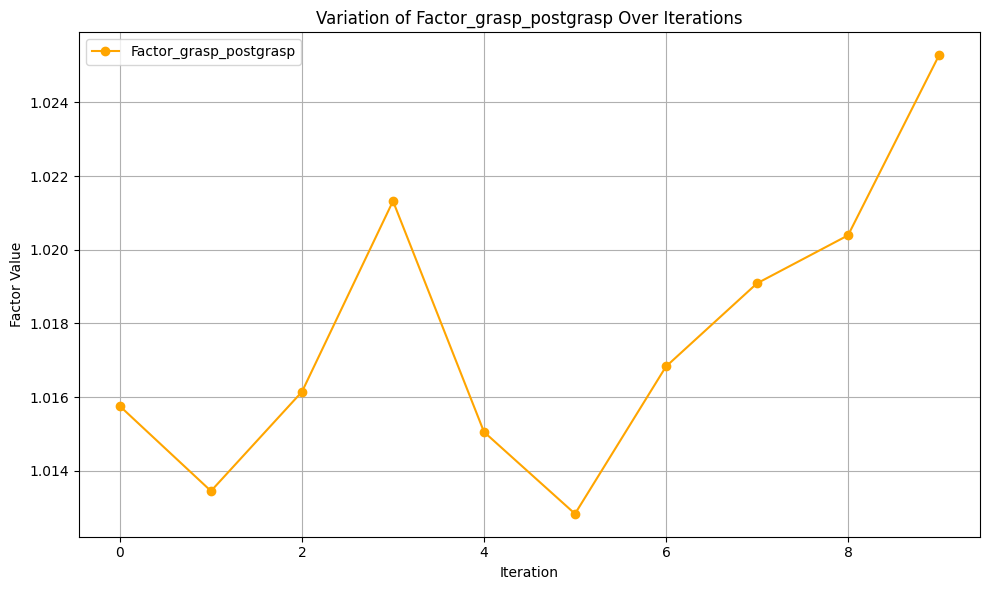

In [22]:
values = list(df.Factor_grasp_postgrasp)
plt.figure(figsize=(10, 6))
plt.plot(df['Factor_grasp_postgrasp'], label='Factor_grasp_postgrasp', marker='o', color='orange')
plt.title('Variation of Factor_grasp_postgrasp Over Iterations')

plt.xlabel('Iteration')
plt.ylabel('Factor Value')
plt.legend()
plt.grid(True)

plt.show()

In [24]:
df

,Unnamed: 0,Estimate_init_pregrasp,Time_init_pregrasp,Factor_init_pregrasp,Estimate_pregrasp_grasp,Time_pregrasp_grasp,Factor_pregrasp_grasp,Time_grip,Estimate_grasp_postgrasp,Time_grasp_postgrasp,Factor_grasp_postgrasp,Grasp
0,0,3.117481,3.156,1.012356,1.811089,1.853,1.023141,2.374,1.809497,1.838,1.015752,SUCCESS
1,1,3.117273,3.153,1.011461,1.818033,1.847,1.015933,2.397,1.808674,1.833,1.013450,SUCCESS
2,2,3.117190,3.149,1.010205,1.817138,1.863,1.025239,2.388,1.809778,1.839,1.016146,SUCCESS
3,3,3.117353,3.149,1.010152,1.816891,1.846,1.016021,2.400,1.809419,1.848,1.021322,SUCCESS
4,4,3.117201,3.135,1.005710,1.811429,1.847,1.019637,2.397,1.811727,1.839,1.015054,SUCCESS
5,5,4.883309,4.929,1.009357,1.820902,1.859,1.020923,2.395,1.812740,1.836,1.012832,SUCCESS
6,6,3.117155,3.145,1.008933,1.811452,1.840,1.015760,2.398,1.809543,1.840,1.016831,SUCCESS
7,7,3.117331,3.156,1.012405,1.818143,1.848,1.016422,2.397,1.809460,1.844,1.019089,SUCCESS
8,8,3.117263,3.149,1.010181,1.818094,1.858,1.021949,2.404,1.794408,1.831,1.020392,SUCCESS
9,9,4.931806,4.959,1.005514,1.825639,1.860,1.018821,2.435,1.825840,1.872,1.025281,SUCCESS
